In [337]:
import os
import glob
from pathlib import Path

import requests
import difflib
import random


import json
import csv
import numpy as np
import pandas as pd 
import sklearn as sk 
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib notebook
import mplcursors
from ipywidgets import widgets
from ipywidgets import GridspecLayout
from ipywidgets import interactive

In [338]:
os.getcwd()
os.listdir('./transformed-data/')

['ChartingProjectSparsity.json', 'augmented_player_overview.csv', 'aggdf.csv']

In [339]:
filepath = "./transformed-data/aggdf.csv"
df = pd.read_csv(filepath)
print(df.columns)

Index(['player', 'aces', 'bk_pts', 'bp_saved', 'crosscourt', 'deep', 'dfs',
       'down_middle', 'down_the_line', 'err_deep', 'err_net', 'err_wide',
       'err_wide_deep', 'first_aces', 'first_forced', 'first_in', 'first_pts',
       'first_pts_won', 'first_unret', 'first_won', 'first_won_lte_3_shots',
       'forced_err', 'in_play', 'in_play_won', 'induced_forced', 'inside_in',
       'inside_out', 'net_pts', 'net_unforced', 'net_winner', 'passed_at_net',
       'passing_shot_induced_forced', 'pt_ending', 'pts', 'pts_won',
       'pts_won_lte_3_shots', 'return_forced', 'return_pts', 'return_pts_won',
       'returnable', 'returnable_won', 'second_aces', 'second_forced',
       'second_in', 'second_pts', 'second_pts_won', 'second_unret',
       'second_won', 'second_won_lte_3_shots', 'serve_pts', 'serve_return',
       'shallow', 'shots', 'shots_in_pts_lost', 'shots_in_pts_won', 'snv_pts',
       'total_shots', 'unforced', 'unforced_bh', 'unforced_fh', 'unret',
       'very_deep', 'w

In [340]:
def multi_checkbox_widget(descriptions):
    """ Widget with a search field and lots of checkboxes """
    search_widget = widgets.Text()
    options_dict = {description: widgets.Checkbox(description=description, value=False) for description in descriptions}
    options = [options_dict[description] for description in descriptions]
    options_widget = widgets.VBox(options, layout={'overflow': 'scroll'})
    multi_select = widgets.VBox([search_widget, options_widget])

    # Wire the search field to the checkboxes
    def on_text_change(change):
        search_input = change['new']
        if search_input == '':
            # Reset search field
            new_options = [options_dict[description] for description in descriptions]
        else:
            # Filter by search field using difflib.
            close_matches = difflib.get_close_matches(search_input, descriptions, cutoff=0.0)
            new_options = [options_dict[description] for description in close_matches]
        options_widget.children = new_options

    search_widget.observe(on_text_change, names='value')
    return multi_select

# Example of using the widget

# Get lots of words for our options
words_url = 'https://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain'
response = requests.get(words_url)
response.raise_for_status()
#words = response.text
#words = set([word.lower() for word in words.splitlines()])
descriptions = df.columns #random.sample(words, 100)

checkboxes = multi_checkbox_widget(descriptions)
checkboxes

In [342]:
selected_options = [w.description for w in widget.children[1].children if w.value]
print(selected_options)
eps = 0.025
min_samples= 1

['crosscourt', 'serve_return', 'shallow']


In [343]:
# split data
X = df.loc[:, df.columns != 'player']
labels = df['player']
X = df[selected_options]

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled)

#cluster
dbscan = DBSCAN(eps=eps,min_samples=min_samples)
clusterlabels = dbscan.fit_predict(X_scaled)
print(clusterlabels)
print(len(X.columns))

[ 0  0  1  0  2  3  4  5  6  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0
  0  0  0  0  0  0  0  8  0  9 10  0  0  0 11 12  0 13  0  0  0 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 13  0 13  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [344]:
#umap dimension reduction
#aumap = umap.UMAP(n_components = 2)
#data = aumap.fit_transform(X)

#pca dimension reduction
pca = sk.decomposition.PCA(n_components = 2)
pca.fit(X)
data = pca.transform(X)
#print(pca.explained_variance_ratio_)
#print(pca.components_)

In [345]:
# search dashboard
text = widgets.Text()
button = widgets.Button(
    description='Confirm',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

display(text)
display(button)

def handle_text_submit(sender):
    idx = labels[labels==text.value]
    point = None
    if(len(idx)>0):
        pointidx = idx.index[0]
        point = data[pointidx]
    print(text.value,": ",point)

def handle_button_submit(sender):
    print('hi')
    
text.on_submit(handle_text_submit)
button.on_click(handle_button_submit)

Text(value='')

Button(description='Confirm', icon='check', style=ButtonStyle(), tooltip='Click me')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


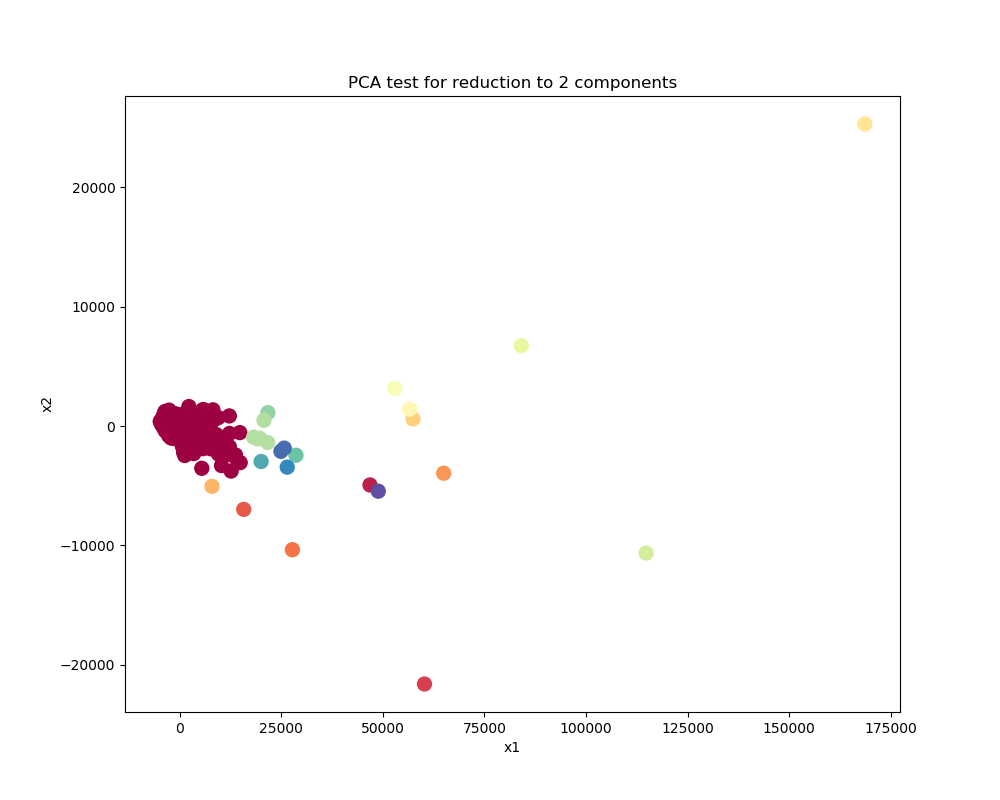

In [349]:
#plot data
x = data[:,0]
y = data[:,1]
names = labels.to_numpy()
param = 'winners'
c = clusterlabels #np.log(X[param].to_numpy()+0.001) #np.random.randint(1,5,size=len(x))
#c = X[param].to_numpy()
maximum = np.max(c)
minimum = np.min(c)
print(type(names),type(c))

norm = plt.Normalize(1,4)
cmap = plt.cm.Spectral #RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([(names[n]+':'+(str)(c[n])) for n in ind["ind"]])) #, 
                           #" ".join([(str)(c[n]) for n in ind["ind"]]))
    
    
#     "{}:{}".format(" ".join([names[n] for n in ind["ind"]]),
#                        " ".join([c[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
fig.set_size_inches(10,8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('PCA test for reduction to 2 components')
canvas = plt.show()
plt.clim(minimum, maximum)
#plt.colorbar(axp,cmap = c)


In [354]:
def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([(names[n]+':'+(str)(c[n])) for n in ind["ind"]])) #, 
                           #" ".join([(str)(c[n]) for n in ind["ind"]]))
    
    
#     "{}:{}".format(" ".join([names[n] for n in ind["ind"]]),
#                        " ".join([c[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()


def aplot():
    norm = plt.Normalize(1,4)
    cmap = plt.cm.Spectral #RdYlGn

    fig,ax = plt.subplots()
    sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)
    fig.canvas.mpl_connect("motion_notify_event", hover)
    fig.set_size_inches(10,8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('PCA test for reduction to 2 components')
    canvas = plt.show()
    plt.clim(minimum, maximum)

In [358]:
#grid
grid = GridspecLayout(2, 3)
grid[0, 0] = checkboxes
grid[0, 1] = button
grid[0, 2] = text
grid[1,:] = interactive(aplot)
grid

GridspecLayout(children=(VBox(children=(Text(value=''), VBox(children=(Checkbox(value=False, description='play…

hi
Serena_Williams :  [12670.6267037  -3773.11207593]
Serena_Williams :  [12670.6267037  -3773.11207593]


sources
<br>
https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
<br>
https://medium.com/@jdchipox/how-to-interact-with-jupyter-33a98686f24e
<br>
https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
<br>
https://gist.github.com/pbugnion/5bb7878ff212a0116f0f1fbc9f431a5c (better checklist)
<br>
https://blog.jupyter.org/introducing-templates-for-jupyter-widget-layouts-f72bcb35a662 (grid layout for widgets)
<br>